# ESCA 1vsAll Volcano Plots
Andrew E. Davidson  
aedavids@ucsc.edu  
5/1/24

Copyright (c) 2020-2023, Regents of the University of California All rights reserved. https://polyformproject.org/licenses/noncommercial/1.0.0

ref: extraCellularRNA/terra/jupyterNotebooks/cibersort/volcanoPlots.ipynb

In [1]:
import ipynbname
from IPython.display import display
from IPython.display import Image
import pathlib as pl
import pandas as pd
import os
import sys

notebookName = ipynbname.name()
notebookPath = ipynbname.path()
notebookDir = os.path.dirname(notebookPath)

outDir = f'{notebookDir}/{notebookName}.out'
os.makedirs(outDir, exist_ok=True)
print(f'outDir:\n{outDir}')

imgOut = f'{outDir}/img'
os.makedirs(imgOut, exist_ok=True)
print(f'\nimgOut :\n{imgOut}')

outDir:
/private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out

imgOut :
/private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img


/data/tmp/ipykernel_1355640/2060745374.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# setting the python path allows us to run python scripts from using
# the CLI. 
PYTHONPATH = os.environ['PYTHONPATH']
print("ORIG_PYTHONPATH: {}\n".format(PYTHONPATH))

gitRepoRoot = !git rev-parse --show-toplevel
gitRepoRoot = gitRepoRoot[0]


#
# add deseq modules
#
deseqModules = f'{gitRepoRoot}/terra/deseq/python'
# deseqModules = f'{gitRepoRoot}/terra'
print("deseqModules: {}\n".format(deseqModules))

PYTHONPATH = PYTHONPATH + f':{deseqModules}'
print("PYTHONPATH: {}\n".format(PYTHONPATH))

#
# add deconvolutionAnalysis modules
#
deconvolutionModules = f'{gitRepoRoot}/deconvolutionAnalysis/python'
print("deconvolutionModules: {}\n".format(deconvolutionModules))

PYTHONPATH = PYTHONPATH + f':{deconvolutionModules}'
print("PYTHONPATH: {}\n".format(PYTHONPATH))


#
# to be able to import our local python files we need to set the sys.path
# https://stackoverflow.com/a/50155834
#
sys.path.append( str(deseqModules) )
sys.path.append( str(deconvolutionModules) )
print("\nsys.path:\n{}\n".format(sys.path))

ORIG_PYTHONPATH: :/private/home/aedavids/extraCellularRNA/src

deseqModules: /private/home/aedavids/extraCellularRNA/terra/deseq/python

PYTHONPATH: :/private/home/aedavids/extraCellularRNA/src:/private/home/aedavids/extraCellularRNA/terra/deseq/python

deconvolutionModules: /private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/python

PYTHONPATH: :/private/home/aedavids/extraCellularRNA/src:/private/home/aedavids/extraCellularRNA/terra/deseq/python:/private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/python


sys.path:
['/private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks', '/private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks', '/private/home/aedavids/extraCellularRNA/src', '/private/home/aedavids/miniconda3/envs/extraCellularRNA/lib/python311.zip', '/private/home/aedavids/miniconda3/envs/extraCellularRNA/lib/python3.11', '/private/home/aedavids/miniconda3/envs/extraCellularRNA/lib/python3.11/lib-dynload', '', '/private/ho

In [3]:
#local imports
from pipeline.dataFactory.utilities import urlify
from plots import volcanoPlots
# from deseq.python.plots import volcanoPlots

In [4]:
# load data
dataRoot = '/private/groups/kimlab/GTEx_TCGA/1vsAll'
deseqResultsFileName = "ESCA_vs_all.results"
deseqResultsFilePath = f'{dataRoot}/{deseqResultsFileName}'

In [15]:
%%time

def createVolcanoPlot(deseqResults, imgFilePath, numHeaderLines, plotTitle=None, geneNamesPath=None):
    '''
    arguments:
        pythonPath:
            set PYTHONPATH to this value. required to find volcano plot code
        deseqResults:
            example: /private/groups/kimlab/GTEx_TCGA/1vsAll/Kidney_Cortex_vs_all.results
            
        imgFilePath: 
            file path to save image with
            
        numHeaderLines
            integer: number of lines at the top of the results file to skip
            
        plotTitle:
            string: plot title string
            
        geneNamesPath
            file that contains genes we want to color red
            
    returns exit status
    '''

    if geneNamesPath:
        arguments ='''--inputFile {} \\
                        --title '{}' \\
                        --output {}  \\
                        --numHeaderLines {} \\
                        --geneNamesFile {}'''.format(deseqResults, 
                                                   plotTitle, 
                                                   imgFilePath, 
                                                   numHeaderLines, 
                                                   geneNamesPath)
    else:
        arguments ='''--inputFile {} \\
                        --title '{}' \\
                        --output {}  \\
                        --numHeaderLines {}'''.format(deseqResults, 
                                                   plotTitle, 
                                                   imgFilePath, 
                                                   numHeaderLines, )
    print("arguments:\n{}".format(arguments))
    
    exitStatus = ! (export PYTHONPATH=$PYTHONPATH; python -m plots.volcanoPlots $arguments)
    print("exit status:{}".format(exitStatus))
    return exitStatus


CPU times: user 88 µs, sys: 4 µs, total: 92 µs
Wall time: 111 µs


aedwip /private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img/ESCA_vs_allresults-1vsAll.png
arguments:
--inputFile /private/groups/kimlab/GTEx_TCGA/1vsAll/ESCA_vs_all.results \
                        --title 'ESCA_vs_all.results 1vsAll' \
                        --output /private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img/ESCA_vs_allresults-1vsAll.png  \
                        --numHeaderLines 8
exit status:["findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial", "findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial", "findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial", "findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial", "findfont: Generic family 'sans-serif' not found 

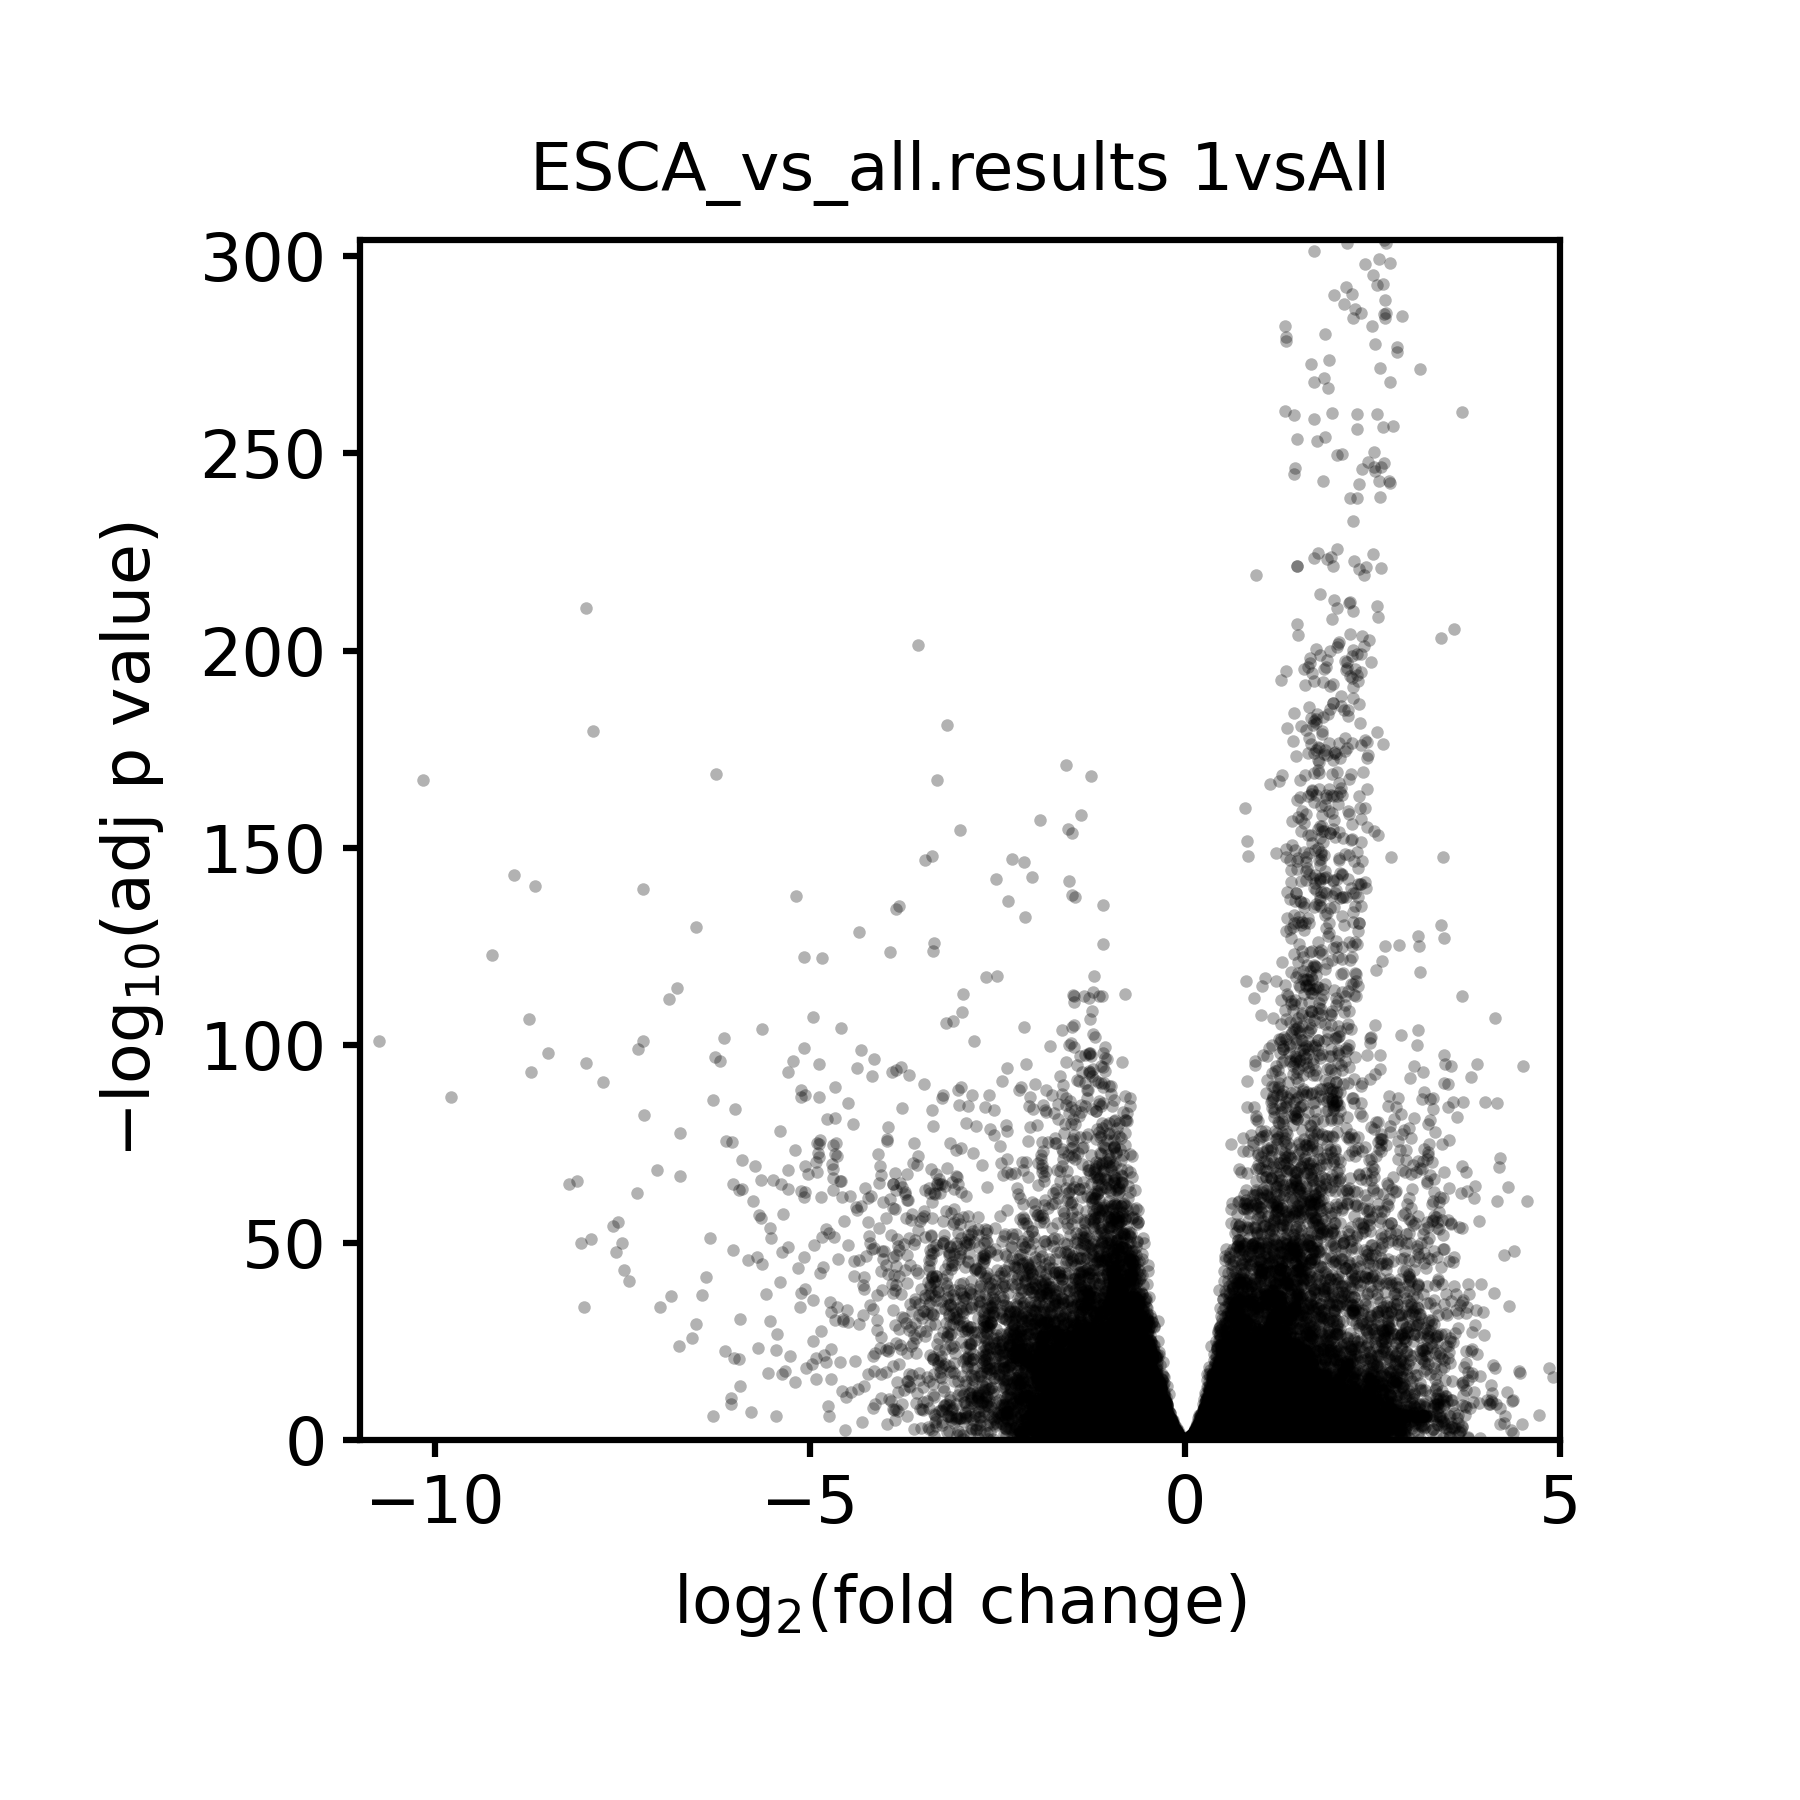

In [17]:
# set arguments 
# sampleFileName = "Kidney_Cortex_vs_all.results"
# sampleFilePath = f'{dataRoot}/sampleFileName'
                                   
# imgFilePath = str(testFilePath) + ".png"
plotTitle = "{} 1vsAll".format(deseqResultsFileName)
imgFilePath = imgOut +"/" + urlify(plotTitle) + ".png" 
print(f'aedwip {imgFilePath}')
numHeaderLines = 8
                
# plot
exitStatus = createVolcanoPlot(deseqResultsFilePath, 
                               imgFilePath, 
                               numHeaderLines, 
                               plotTitle, 
                               geneNamesPath=None)


      
# display
Image(imgFilePath)    

In [ ]:
exitStatus = ! ( export PYTHONPATH=$PYTHONPATH; echo "aedwip $PYTHONPATH aedwip"; python -m plots.volcanoPlots )
print("exit status:{}".format(exitStatus))